In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image


In [50]:
model = tf.keras.models.load_model('v3.h5')


In [51]:
y_test = pd.read_csv('dataset\\Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data = []

for img in imgs:
    image = Image.open('dataset\\' + img)
    image = image.resize((30, 30))
    data.append(np.array(image))

X_test = np.array(data)
pred = model.predict(X_test)

decoded = []
for i in range(pred.shape[0]):
    decoded.append(pred[i, :].argmax())


395/395 [==============================] - 10s 25ms/step


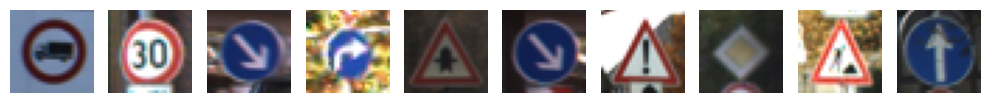

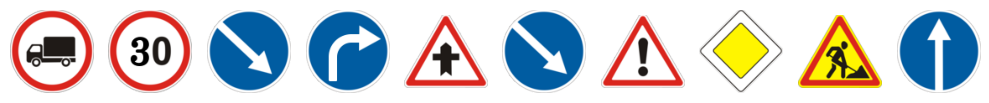

In [52]:
# images and predicted signs
num_of_images = 10
fig = plt.figure(figsize=(10, 10))
for num, X in zip(np.arange(1, num_of_images + 1), X_test):
    ax = fig.add_subplot(1, num_of_images, num)
    ax.imshow(X[:, :, :3])
    ax.axis('off')
plt.tight_layout()

fig = plt.figure(figsize=(10, 10))
for num, lable in zip(np.arange(1,num_of_images + 1), decoded):
    ax = fig.add_subplot(1, num_of_images, num)
    ax.imshow(np.asarray(Image.open("dataset\\Meta\\{}.png".format(lable))))
    ax.axis('off')
plt.tight_layout()


In [55]:
# Accuracy with the test data
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score
print("Accuracy - ", accuracy_score(labels, decoded))
print("Balanced accuracy - ", balanced_accuracy_score(labels, decoded))
print("Precision weighted - ", precision_score(labels, decoded, average='weighted'))
print("Recall weighted - ", recall_score(labels, decoded, average='weighted'))


Accuracy -  0.9391923990498813
Balanced accuracy -  0.9106997257788462
Precision weighted -  0.9408260488865184
Recall weighted -  0.9391923990498813


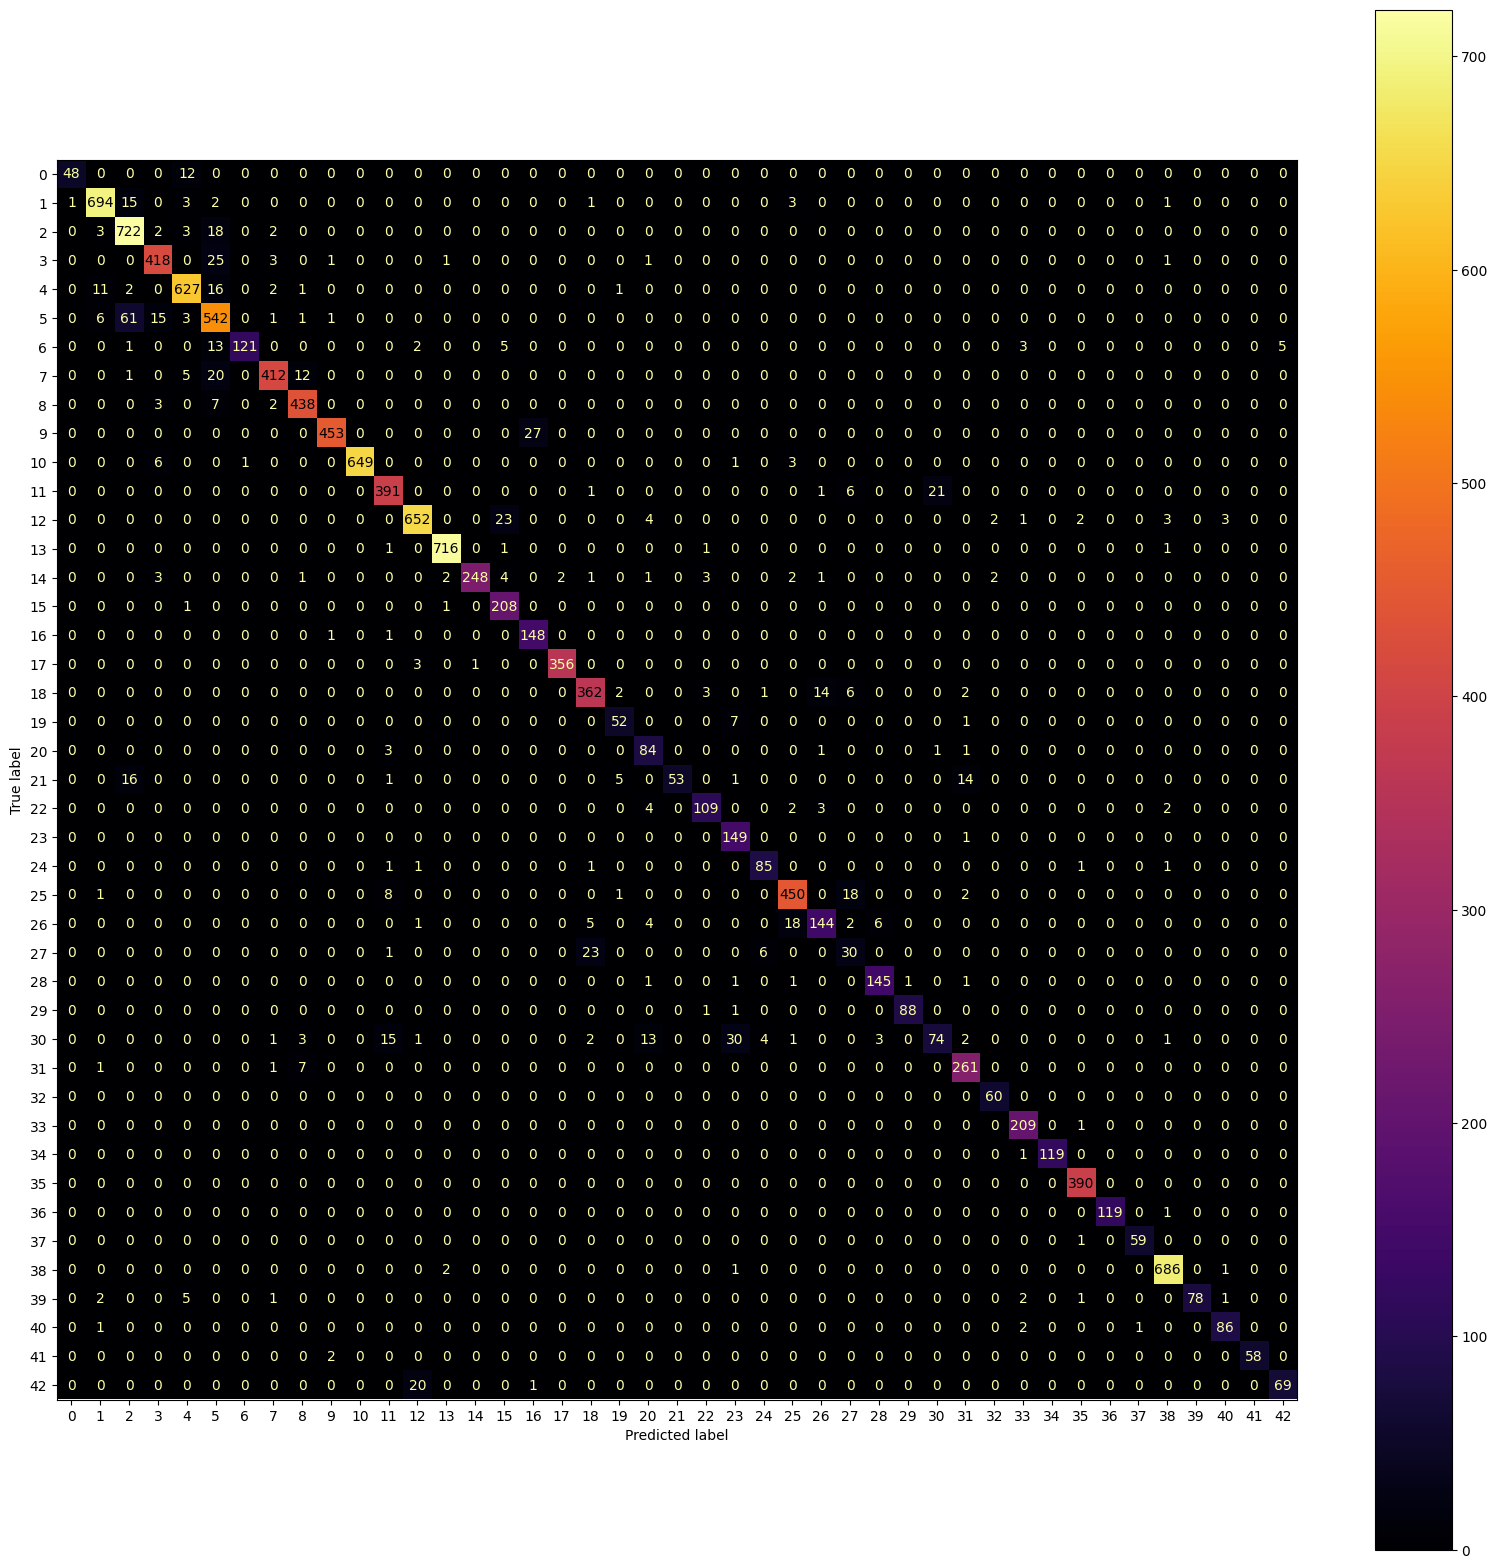

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(20, 20))
disp = ConfusionMatrixDisplay.from_predictions(labels, decoded, ax=ax, cmap='inferno')
